## Data EDA
#### 해당 EDA 는 4_OutlierToEDA 이후 파일임
---

  1. Set data
    - Set the time stamp for heat map and scatter plot
    - Calculate Again the `"단지별 평균 월세", "단지펼 평균 보증금"` Because We use only current infomation of `"월세금(만원)), "보증금(만원)"`
      
    ---


  2. EDA
    - Seperate Data
        1. `apt_lease`
        2. `apt_rent`
        3. `officetel_lease`
        4. `officetel_rent`

    - Check the count of each categories
        - `filename: bar_plot_count_apt_office_rent_lease.png`

    - Check the count of `'단지별 평균 월세', '단지별 평균 보증금'`

    - EDA of `'단지별 평균 월세', '단지별 평균 보증금'`
        1. `apt_lease`
        2. `apt_rent`
        3. `officetel_lease`
        4. `officetel_rent`

    ---

  3. Correlation

    - APT-LEASE EDA
        - Setting
            1. Set the numeric columns
            2. Set the path to save image
        - EDA
            - `Heat map`
            - `Scatter plot (pair)`

    - OFFICE-LEASE EDA
        - EDA
            - `Heat map`
            - `Scatter plot (pair)`

    ---
    
  4. Only lease data
    - Set data(`"전월세구분"=="전세"`)
    - Transfer to `log("보증금(만원)", "단지별_평균_평균보증금")`
    - EDA each APT, OFFCETEL

  5. Save processed data
    - Drop the columns not usefull
    - Save data
        - `name: final_lease_.csv`
    
    ---

      
    

#### data load

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install koreanize-matplotlib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib as mpl

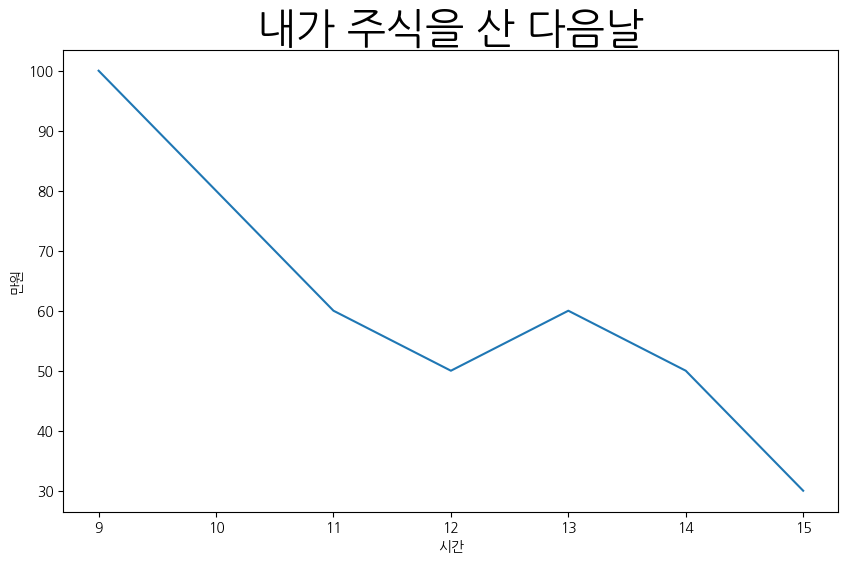

In [4]:
import koreanize_matplotlib
a = [1,2,3,4,5,6,7,8,9,10]
b = np.random.rand(10)
plt.figure(figsize=(10, 6))
plt.plot([9, 10, 11, 12, 13, 14, 15], [100, 80, 60, 50, 60, 50, 30])
plt.title('내가 주식을 산 다음날', size=30)
plt.xlabel('시간')
plt.ylabel('만원')
plt.show()

### EDA
- Seperate Data
    1. `apt_lease`
    2. `apt_rent`
    3. `officetel_lease`
    4. `officetel_rent`

- Check the count of each categories
    - `filename: bar_plot_count_apt_office_rent_lease.png`

- Check the count of `'단지별 평균 월세', '단지별 평균 보증금'`

- EDA of `'단지별 평균 월세', '단지별 평균 보증금'`
    1. `apt_lease`
    2. `apt_rent`
    3. `officetel_lease`
    4. `officetel_rent`
    


#### EDA After Outlier

#### 이상치 제거 시작
- IQR 은 보증금log -> IQR 은 Normal distribution에서 사용하기 좋음
- 단지별 보증금log IQR
- 구별 보증금log IQR
- 기준으로 행이 이상치인지 아닌지 분별
    - `"구이상치","단지이상치"`


In [5]:
# ## 데이터 포맷 저장
# lease_df.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/4_final_lease.csv", index=False, date_format="%Y-%m-%d")

# 로드시 참고
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/4_final_lease.csv",
                 parse_dates=["계약날짜"],  # 날짜 컬럼 복구
                 dtype={                  # category 컬럼 복구
                     "주택유형": "category",
                     "계약구분보완(범주)": "category",
                     "계약분기": "category"
                 })


In [6]:
lease_df = df.copy()

In [7]:
len(list(lease_df.columns))

27

In [8]:
lease_df.columns

Index(['단지명', '주택유형', '전체주소', '계약날짜', '계약구분보완(범주)', '계약분기', '층', '건축년도',
       '갱신요구권사용(2진)', '계약연도', '계약개월수', 'IsNewContract(2진)', 'IsRenewal(2진)',
       '종전계약유무(2진)', '단지갯수', '전용면적m', '보증금만원', '종전계약보증금만원', 'Index', 'Rate',
       'PpRate', 'IMF경과년수', '금융위기경과년수', '보증금변화만원', '단지별평균보증금만원', '단지별평균보증금log',
       '보증금log'],
      dtype='object')

#### 데이터 이상치 탐색
1. 보증금 데이터 log 변환 한 것을 기준으로 IQR - 정규분포에서 사용하기 좋음
    - 구 별
    - 단지 별


In [9]:
lease_df["보증금면적비"] = lease_df["보증금만원"] / lease_df["전용면적m"]


In [10]:
lease_df['보증금면적비'].describe()

,보증금면적비
count,1.024931e+06
mean,6.912801e+02
std,3.025506e+02
min,1.004352e-01
25%,4.830085e+02
50%,6.462585e+02
75%,8.368201e+02
max,4.486764e+03


In [11]:
lease_df['구'] = lease_df['전체주소'].str.split().str[1]
lease_df['구갯수'] = lease_df.groupby('구')['구'].transform('count')


In [12]:
lease_df

,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,층,건축년도,갱신요구권사용(2진),계약연도,...,PpRate,IMF경과년수,금융위기경과년수,보증금변화만원,단지별평균보증금만원,단지별평균보증금log,보증금log,보증금면적비,구,구갯수
0,대성유니드,아파트,서울특별시 성동구 마장로37길 7,2019-04-30,신규,2,18,2004,0,2019,...,5.285769,21.424658,10.627397,-1.0,53752.296588,10.892160,10.545368,636.515913,성동구,40051
1,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,12,2000,0,2019,...,5.285769,21.424658,10.627397,-1.0,54107.646751,10.898749,10.849357,607.956558,성동구,40051
2,대림e-편한세상,아파트,서울특별시 성동구 행당로 79,2019-04-30,신규,2,2,2000,0,2019,...,5.285769,21.424658,10.627397,-1.0,49621.343129,10.812196,10.757924,553.788147,성동구,40051
3,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,8,2017,0,2019,...,5.285769,21.424658,10.627397,-1.0,93082.987887,11.441257,11.156265,827.286265,종로구,8537
4,한남아이파크애비뉴,아파트,서울특별시 용산구 독서당로 46,2019-04-30,신규,2,5,2017,0,2019,...,5.285769,21.424658,10.627397,-1.0,57191.568528,10.954179,10.736418,942.821948,용산구,24642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024926,가우디오피스텔,오피스텔,서울특별시 동대문구 장한로 80,2024-05-01,신규,2,5,2020,0,2024,...,5.091858,26.432877,15.635616,-1.0,21359.615385,9.969304,9.937937,880.851064,동대문구,33540
1024927,프라하임 장안2차,오피스텔,서울특별시 동대문구 장한로26나길 21,2024-05-01,신규,2,12,2022,0,2024,...,5.091858,26.432877,15.635616,-1.0,32178.571429,10.379087,10.275086,998.278830,동대문구,33540
1024928,마곡 파크뷰 대방디엠시티 오피스텔,오피스텔,서울특별시 강서구 마곡동로10길 23,2024-05-01,갱신,2,10,2019,0,2024,...,5.091858,26.432877,15.635616,1000.0,19539.735584,9.880257,9.966509,798.350825,강서구,85770
1024929,방학신화 하니엘시티,오피스텔,서울특별시 도봉구 노해로63가길 229,2024-05-01,신규,2,2,2021,0,2024,...,5.091858,26.432877,15.635616,-1.0,13681.830065,9.523897,9.497097,850.031908,도봉구,26469


In [13]:
lease_df['구'].value_counts()

,count
구,
송파구,87488
강서구,85770
강남구,81661
노원구,71064
영등포구,61575
강동구,58148
서초구,56690
양천구,50700
마포구,47240


In [14]:
## object 를 컬럼에서 그룹바이로 IQR을 계산하고 행이 이상값인지 아닌지 0,1
def iqr_outlier(df, group_col, target_col):
    grouped = df.groupby(group_col)[target_col]
    Q1 = grouped.transform(lambda x: x.quantile(0.25))
    Q3 = grouped.transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[target_col] < lower_bound) | (df[target_col] > upper_bound)



In [15]:
# '구', '단지명', '전용면적m'을 함께 고려한 이상치 탐지
lease_df["구_단지별_이상치(2진)"] = iqr_outlier(lease_df, ["구", "단지명", "전용면적m"], "보증금log")


In [28]:
lease_df["구_단지별_이상치만원(2진)"] = iqr_outlier(lease_df, ["구", "단지명", "전용면적m"], "보증금만원")

In [35]:
# 🔹 이상치 개수 확인
print("구-단지-평방미터 이상치 개수:", lease_df["구_단지별_이상치(2진)"].sum())
print("구-단지-평방미터 이상치 원본기준 개수:", lease_df["구_단지별_이상치만원(2진)"].sum())


구-단지-평방미터 이상치 개수: 32547
구-단지-평방미터 이상치 원본기준 개수: 36161
계약년도별 이상치 개수: 50082


In [47]:
lease_df.loc[(lease_df["구_단지별_이상치(2진)"]==1 )&(lease_df["구_단지별_이상치만원(2진)"]==1 ), ['보증금만원','보증금log','단지별평균보증금만원','단지별평균보증금log', '구','단지명','전용면적m', '구갯수', '단지갯수',"계약연도"]]

,보증금만원,보증금log,단지별평균보증금만원,단지별평균보증금log,구,단지명,전용면적m,구갯수,단지갯수,계약연도
96,12313.0,9.418492,37650.616740,10.536131,서초구,서초네이처힐6단지,49.90,56690,468,2019
128,12967.0,9.470240,33944.756198,10.432519,강남구,강남신동아파밀리에2단지,59.97,81661,457,2019
129,12967.0,9.470240,33944.756198,10.432519,강남구,강남신동아파밀리에2단지,59.97,81661,457,2019
130,12967.0,9.470240,33944.756198,10.432519,강남구,강남신동아파밀리에2단지,59.97,81661,457,2019
136,44000.0,10.691968,101830.833608,11.531078,송파구,레이크팰리스,59.97,87488,2153,2019
...,...,...,...,...,...,...,...,...,...,...
1024742,33000.0,10.404293,23850.802139,10.079615,구로구,힐스테이트 신도림역 센트럴,29.99,41133,294,2024
1024768,29000.0,10.275086,22000.000000,9.998843,광진구,건대 트레비앙 오피스텔,17.46,19347,88,2024
1024771,23700.0,10.073273,26948.486911,10.201720,서대문구,디에이원파크,32.09,26835,248,2024
1024806,15800.0,9.667829,19851.428571,9.896082,은평구,한성벨라트리,28.60,37389,35,2024


In [48]:
lease_df["조합별_개수"] = lease_df.groupby(["구", "단지명", "전용면적m"])["보증금만원"].transform("count")


In [50]:
lease_df[lease_df["조합별_개수"]<10]

,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,층,건축년도,갱신요구권사용(2진),계약연도,...,단지별평균보증금log,보증금log,보증금면적비,구,구갯수,구_단지별_이상치(2진),구_단지별_이상치만원(2진),계약년도별이상치,구_단지_면적,조합별_개수
25,탑힐,아파트,서울특별시 중구 청구로1길 6,2019-04-30,신규,2,3,2002,0,2019,...,9.736114,9.741027,427.995972,중구,15086,0,False,False,중구_탑힐_39.72,4
42,신도,아파트,서울특별시 중랑구 공릉로13길 30,2019-04-30,신규,2,17,1998,0,2019,...,10.507359,10.308986,261.210274,중랑구,24641,0,False,False,중랑구_신도_114.85,8
78,애오개아이파크,아파트,서울특별시 마포구 굴레방로1길 25,2019-04-30,신규,2,12,2016,0,2019,...,10.448508,10.122663,1505.441354,마포구,47240,0,False,False,마포구_애오개아이파크_16.54,4
84,이편한세상마포리버파크,아파트,서울특별시 마포구 토정로31길 24,2019-04-30,신규,2,8,2016,0,2019,...,11.307564,9.121181,161.447485,마포구,47240,0,False,False,마포구_이편한세상마포리버파크_56.65,4
102,개나리래미안,아파트,서울특별시 강남구 역삼로 306,2019-04-30,신규,2,3,2006,0,2019,...,11.721305,11.407576,1059.571462,강남구,81661,0,False,False,강남구_개나리래미안_84.94,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024914,아트리버빌 5차,오피스텔,서울특별시 강서구 양천로47나길 48-10,2024-05-01,신규,2,2,2018,0,2024,...,9.916554,9.960293,508.357349,강서구,85770,0,False,False,강서구_아트리버빌 5차_41.64,5
1024915,용산투웨니퍼스트99,오피스텔,서울특별시 용산구 원효로 249,2024-05-01,신규,2,7,2023,0,2024,...,10.514186,10.915107,1450.039547,용산구,24642,0,False,False,용산구_용산투웨니퍼스트99_37.93,3
1024919,엠펠리체,오피스텔,서울특별시 양천구 등촌로 118-1,2024-05-01,신규,2,2,2016,0,2024,...,9.945836,9.667829,414.589347,양천구,50700,0,False,False,양천구_엠펠리체_38.11,4
1024920,하이베라스,오피스텔,서울특별시 양천구 목동서로 37,2024-05-01,신규,2,13,2003,0,2024,...,9.501760,9.510519,382.761554,양천구,50700,0,False,False,양천구_하이베라스_35.27,5


In [51]:

# 2. 이상치 제거 여부 판단
lease_df["이상치_제거"] = (
    (lease_df["조합별_개수"] <= 10) |  # 조건 1: 조합 개수가 10개 이하
    ((lease_df["구_단지별_이상치(2진)"] == 1) & (lease_df["구_단지별_이상치만원(2진)"] == 1))  # 조건 2: 이상치 판별 2번 이상
)

# 3. 이상치 데이터 제거
lease_df = lease_df[~lease_df["이상치_제거"]].drop(columns=["이상치_제거", "조합별_개수"])
lease_df.shape

(903525, 34)

In [52]:
lease_df.shape

(903525, 34)

In [53]:
lease_df.head()

,단지명,주택유형,전체주소,계약날짜,계약구분보완(범주),계약분기,층,건축년도,갱신요구권사용(2진),계약연도,...,단지별평균보증금만원,단지별평균보증금log,보증금log,보증금면적비,구,구갯수,구_단지별_이상치(2진),구_단지별_이상치만원(2진),계약년도별이상치,구_단지_면적
0,대성유니드,아파트,서울특별시 성동구 마장로37길 7,2019-04-30,신규,2,18,2004,0,2019,...,53752.296588,10.892160,10.545368,636.515913,성동구,40051,0,False,False,성동구_대성유니드_59.7
1,행당한진타운,아파트,서울특별시 성동구 행당로 82,2019-04-30,신규,2,12,2000,0,2019,...,54107.646751,10.898749,10.849357,607.956558,성동구,40051,0,False,False,성동구_행당한진타운_84.71
2,대림e-편한세상,아파트,서울특별시 성동구 행당로 79,2019-04-30,신규,2,2,2000,0,2019,...,49621.343129,10.812196,10.757924,553.788147,성동구,40051,0,False,False,성동구_대림e-편한세상_84.87
3,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,8,2017,0,2019,...,93082.987887,11.441257,11.156265,827.286265,종로구,8537,0,False,False,종로구_경희궁자이(2단지)_84.614
5,경희궁자이(2단지),아파트,서울특별시 종로구 송월길 99,2019-04-30,신규,2,6,2017,0,2019,...,93082.987887,11.441257,11.156265,825.121411,종로구,8537,0,False,False,종로구_경희궁자이(2단지)_84.836


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
def histo(df, target):
    plt.figure(figsize=(12, 5))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df[target], bins=30, kde=True)
    plt.xlabel(target)
    plt.ylabel('빈도')
    plt.title(f'{target} 히스토그램')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[target])
    plt.xlabel(target)
    plt.title(f'{target} 박스플롯')

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(df[target], bins=30, kde=True)
    plt.xlabel(target)
    plt.ylabel('빈도')
    plt.title(f'{target} 히스토그램')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[target])
    plt.xlabel(target)
    plt.title(f'{target} 박스플롯')

    plt.tight_layout()
    plt.show()


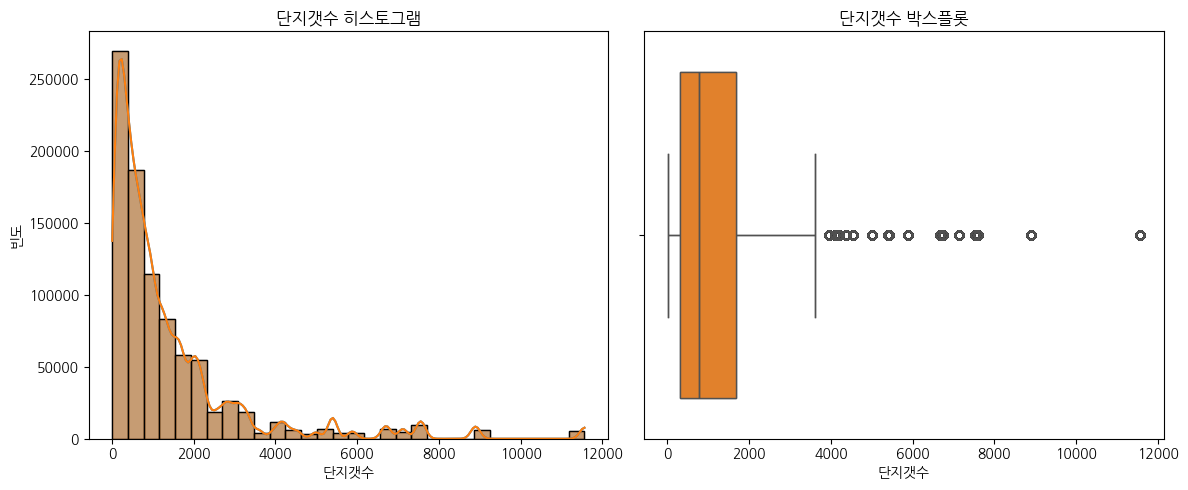

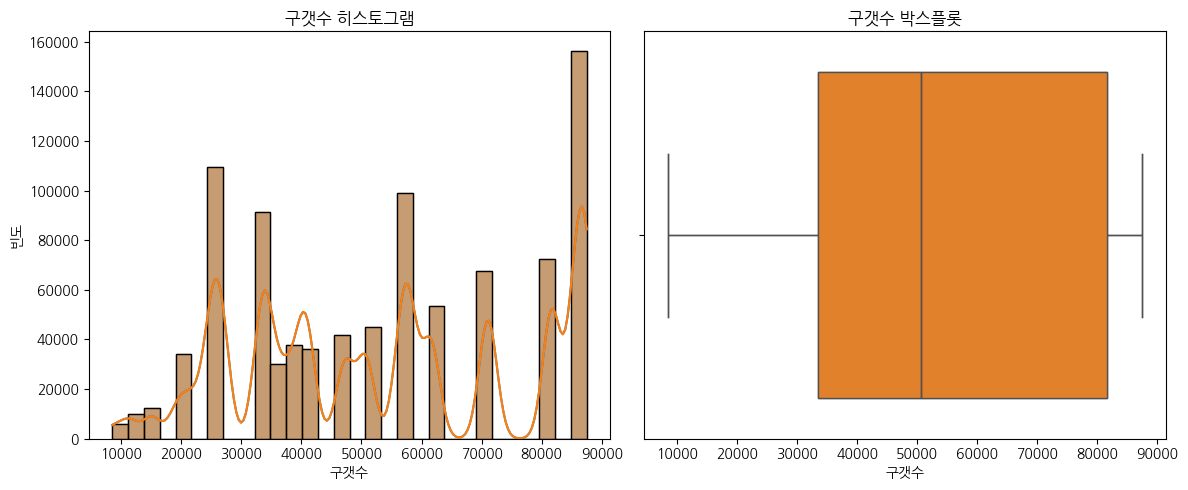

In [55]:
histo(lease_df, "단지갯수")
histo(lease_df, "구갯수")

In [56]:
a = (lease_df['주택유형'] == "아파트").sum()
b = (lease_df['주택유형'] == "오피스텔").sum()
b/a

0.14903901791993449

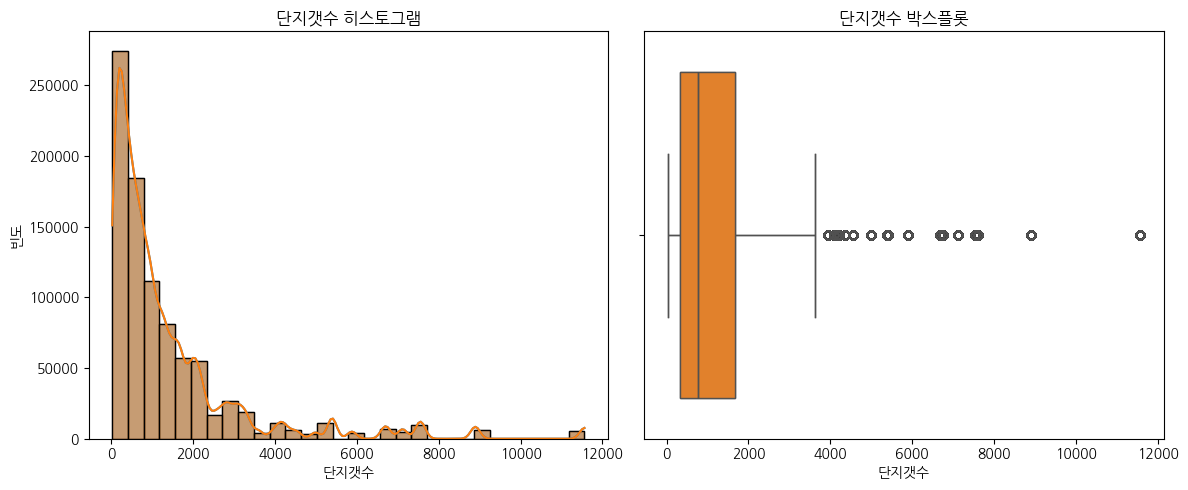

In [57]:
low_except_count = lease_df[lease_df['단지갯수'] > 30]

histo(low_except_count, "단지갯수")

In [62]:
def histo_mean_each(df, save_path=None, housing_type="보증금log"):
    """
    df: pandas DataFrame
    save_path: 저장할 경로 (str)
    housing_type: 그래프 제목을 위한 문자열
    """
    plt.figure(figsize=(10, 5))

    # KDE 그래프 (밀도 함수) - 예쁜 색상 적용
    sns.kdeplot(
        df.loc[df['주택유형'] == "아파트", housing_type],
        fill=True, color="#3498db", alpha=0.6, linewidth=2, label="아파트"  # 블루 계열 (깔끔한 색)
    )

    sns.kdeplot(
        df.loc[df['주택유형'] == "오피스텔", housing_type],
        fill=True, color="#e74c3c", alpha=0.6, linewidth=2, label="오피스텔"  # 레드 계열 (깔끔한 색)
    )

    # 스타일 및 레이블 설정
    plt.legend()
    plt.title(f"{housing_type} 비교 (아파트 vs 오피스텔)", fontsize=14)
    plt.xlabel(f"{housing_type}", fontsize=12)
    plt.ylabel("밀도", fontsize=12)
    plt.grid(alpha=0.3)  # 연한 그리드 추가

    # 저장 옵션
    if save_path:
        plt.savefig(f"{save_path}{housing_type}_KDE.png", dpi=500, bbox_inches="tight")

    plt.show()

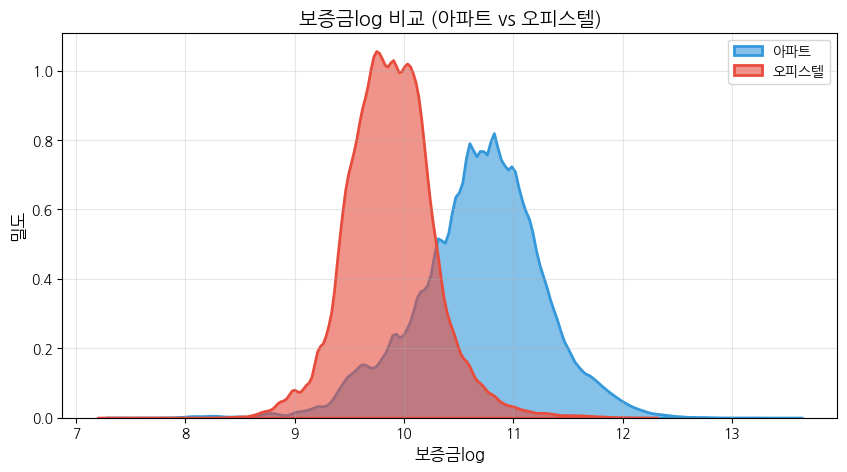

In [63]:
histo_mean_each(lease_df)

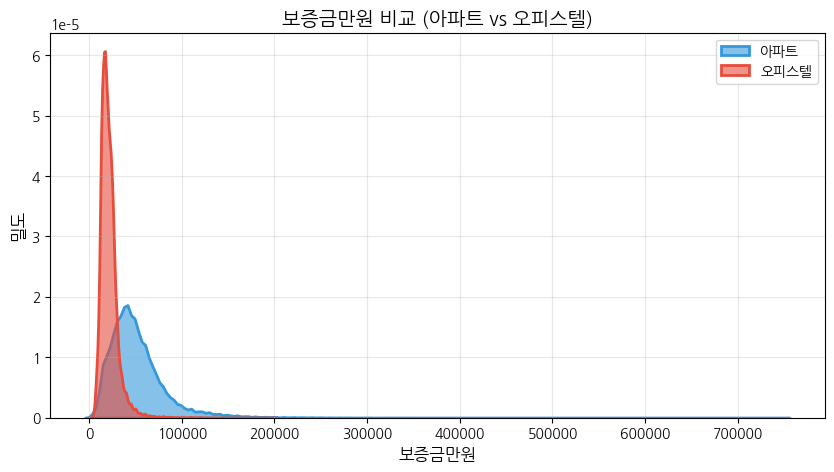

In [64]:
histo_mean_each(lease_df, housing_type="보증금만원")

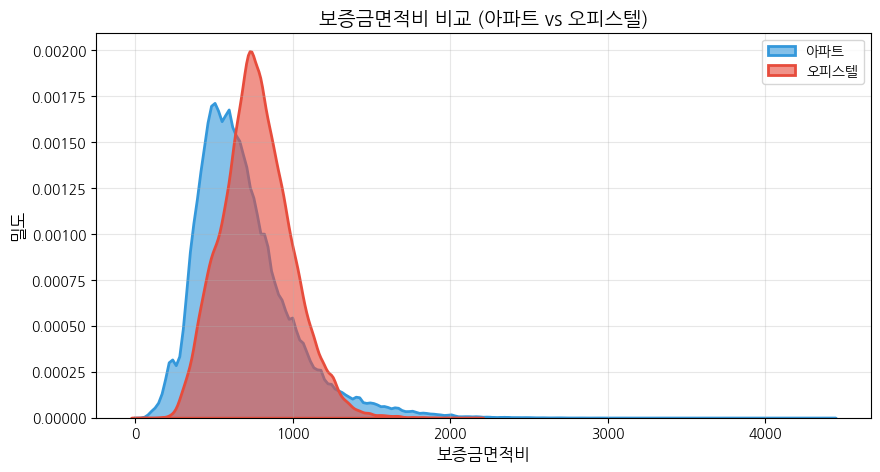

In [68]:
histo_mean_each(lease_df, housing_type="보증금면적비")

In [65]:
a = (lease_df['주택유형'] == "아파트").sum()
b = (lease_df['주택유형'] == "오피스텔").sum()
b/a

0.14903901791993449

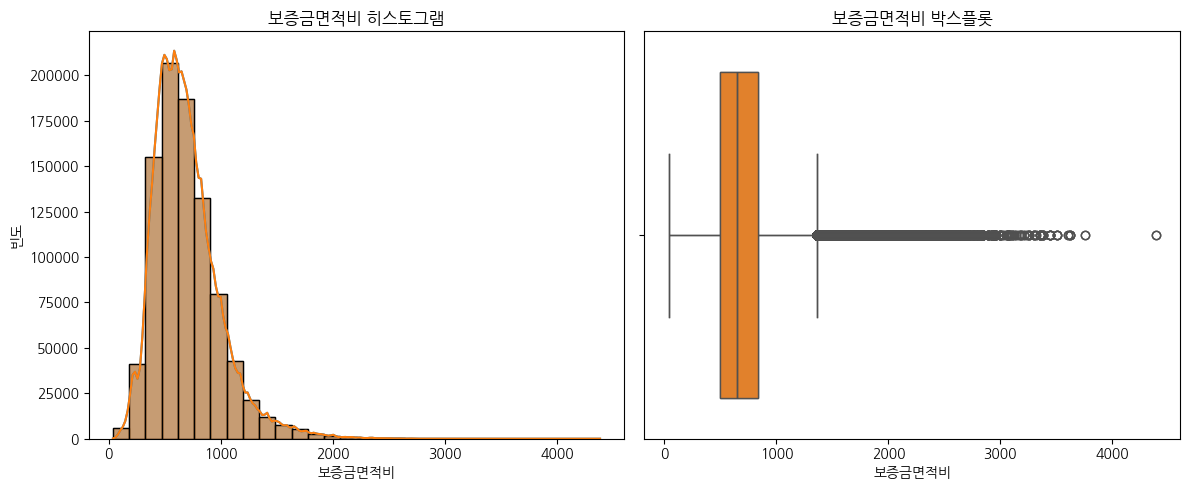

In [67]:
histo(lease_df,'보증금면적비')

In [ ]:
low_except_count['보증금면적비log'] = np.log1p(low_except_count['보증금면적비'])

In [ ]:
histo(low_except_count,'보증금면적비log')

In [ ]:
# def KDEPlot(df, target1,target2, save_path=None):
#     plt.figure(figsize=(8, 6))
#     sns.kdeplot(
#         x=lease_df[target1],
#         y=lease_df[target2],
#         fill=True, cmap="Blues", levels=30, alpha=0.5
#     )
#     sns.scatterplot(x=lease_df[target1], y=lease_df[target2], alpha=0.5, color='red')

#     plt.xlabel(f'{target1}')
#     plt.ylabel(f'{target2}')
#     plt.title(f'{target1} vs {target2}(산점도 + KDE)')
#     if save_path:
#         plt.savefig(f"{save_path}/{target1}-{target2}.png", dpi=300)
#     plt.show()


#### 데이터 저장

In [69]:
# ## 데이터 포맷 저장
lease_df.to_csv("/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/5_non_outlier.csv", index=False, date_format="%Y-%m-%d")
